In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [10]:
data = pd.read_csv("../projet/kc_house_data.csv", parse_dates = ['date'])
print(data)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650   

In [11]:
print(data.shape)
print(data.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [12]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
labels = data['price'].values
features = data.drop(columns=['id', 'date', 'price'])
x=features.values
y=labels
print(x)
print(y)
normalizeur=StandardScaler()
X_train_0, X_test_0, y_train, y_test = train_test_split(x, y, test_size=0.1)
X_train=normalizeur.fit_transform(X_train_0)
X_test=normalizeur.transform(X_test_0)

[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [14]:
def get_score (model):
    model.fit(X_train, y_train)
    model.score(X_train, y_train)
    model.score(X_test, y_test)
    return 'train',model.score(X_train, y_train),'test',model.score(X_test, y_test)

In [15]:
def plot_train_cv_scores(gridsearch_model, title='', save=False, filename=''):
    """
    This function plots the returned training and cross-validation scores
    for different hyperparameters tried in optimization (with GridSearchCV).
    """
    mean_test_score = gridsearch_model.cv_results_['mean_test_score']
    mean_train_score = gridsearch_model.cv_results_['mean_train_score']
    std_test_score = gridsearch_model.cv_results_['std_test_score']
    std_train_score = gridsearch_model.cv_results_['std_train_score']
    hyperparams_combo_size = np.arange(len(mean_test_score))
    
    size=15
    plt.figure(figsize=(10,8))
    
    plt.plot(hyperparams_combo_size, mean_test_score, label='Cross-validation score')
    plt.fill_between(hyperparams_combo_size, mean_test_score-std_test_score, mean_test_score+std_test_score, alpha=0.3)
    
    plt.plot(hyperparams_combo_size, mean_train_score, label='Training score')
    plt.fill_between(hyperparams_combo_size, mean_train_score-std_train_score, mean_train_score+std_train_score, alpha=0.3)
    
    plt.xlabel('Hyperparameter combinations', fontsize=size)
    plt.ylabel('Score', fontsize=size)
    plt.title(title)
    plt.legend()
    plt.grid()
    
    if save :
        plt.savefig(filename, dpi=500)
    
    plt.show()

In [16]:
def get_hyperparametter_star(model,hyperparametter_grid) :
    grid_search = GridSearchCV(estimator = model, param_grid = hyperparametter_grid, 
                          cv = 5, n_jobs = -1, verbose = 2,return_train_score=True)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_,grid_search

# ridge regression

In [17]:
ridge=Ridge()
get_score(ridge)

('train', 0.7001809322871118, 'test', 0.6941277435965842)

In [18]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [19]:
grid={'alpha': [10**(-10**100),1,195,196,197,1000] }
grid_star,model=get_hyperparametter_star(ridge,grid)
print(grid_star)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'alpha': 195}


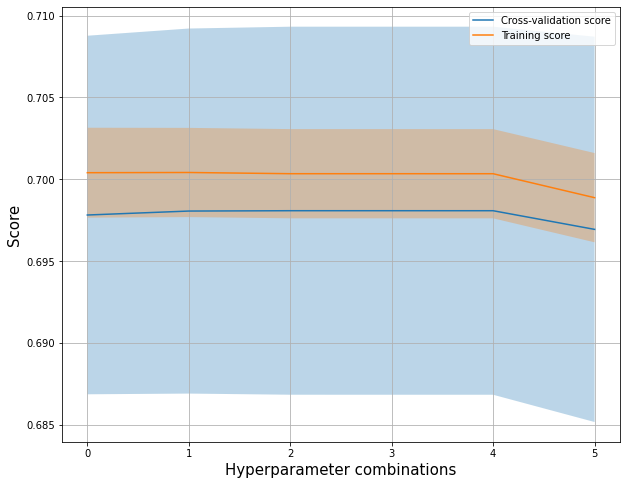

In [20]:
plot_train_cv_scores(model)

In [21]:
#plot_train_cv_scores(model, title='', save=True, filename='ridge_kc_gridsearch.png')
ridge_star=Ridge(alpha=195)
get_score(ridge_star)


('train', 0.7001329427308982, 'test', 0.6949137655968012)

# random forest

In [22]:
random_forest=RandomForestRegressor()

In [23]:
get_score(random_forest)

('train', 0.9823436233957246, 'test', 0.8951439004688392)

In [24]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
param_grid_rf1a = {
    'max_features': [10,'auto','sqrt'],#[10,'auto','sqrt','log2']
    'n_estimators': [50,200,290]#50,300
}

_,model_grid_search=get_hyperparametter_star(random_forest,param_grid_rf1a)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [26]:
model_grid_search.best_params_

{'max_features': 10, 'n_estimators': 290}

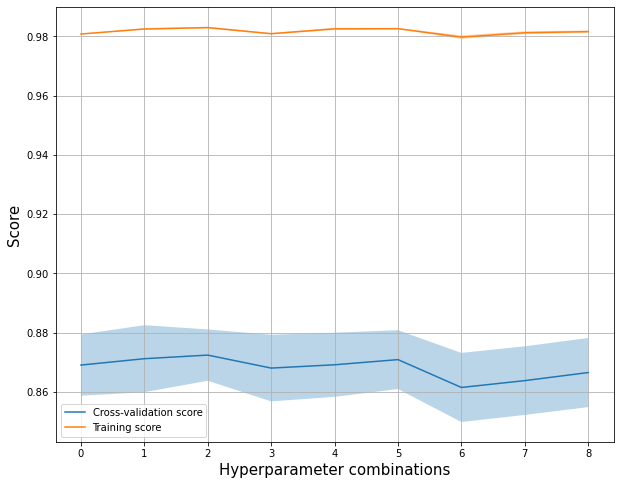

In [27]:
plot_train_cv_scores(model_grid_search)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


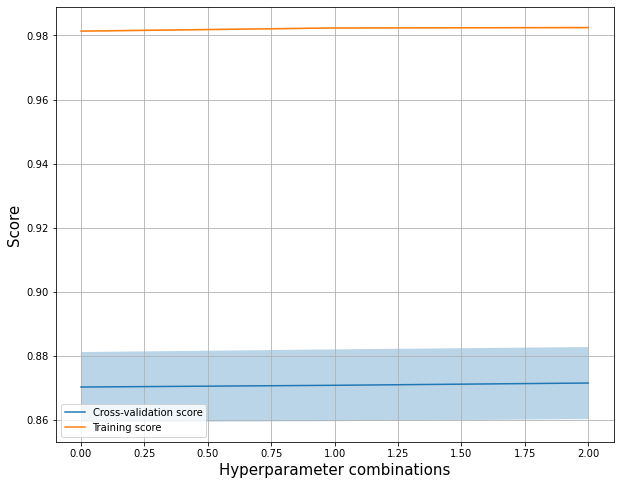

{'n_estimators': 290}


In [28]:
param_grid_rf1b = {
    #'max_features': [10,'auto','sqrt'],#[10,'auto','sqrt','log2']
    'n_estimators': [50,200,290]#50,300
}

_,model_grid_search_1=get_hyperparametter_star(random_forest,param_grid_rf1b)
plot_train_cv_scores(model_grid_search_1)
print(model_grid_search_1.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


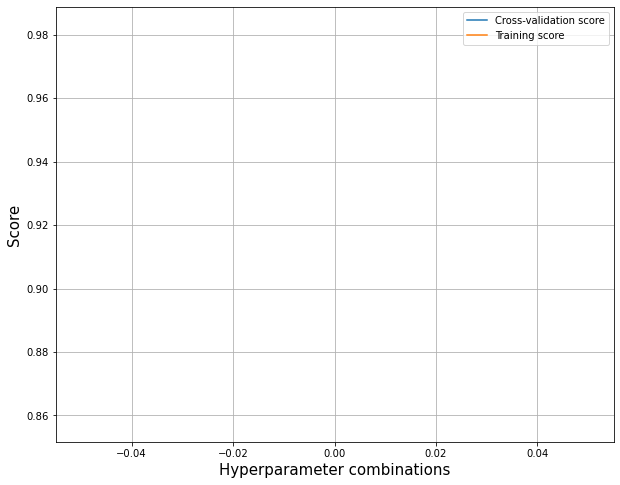

{'max_features': 12}


In [29]:
param_grid_rf1b = {
    'max_features': [12,],#[10,'auto','sqrt','log2']
    #'n_estimators': [50,200,290]#50,300
}

_,model_grid_search_1=get_hyperparametter_star(random_forest,param_grid_rf1b)
plot_train_cv_scores(model_grid_search_1)
print(model_grid_search_1.best_params_)

In [30]:
#plot_train_cv_scores(model_grid_search, title='', save=True, filename='random_forest_kc_gridsearch.png')
random_forest_star=RandomForestRegressor(max_features=10, n_estimators=200)
get_score(random_forest_star)

('train', 0.9832377026974903, 'test', 0.89891164274051)

# bagging regression

In [31]:
bagging=BaggingRegressor()

In [80]:
get_score(bagging)

('train', 0.9744497478569558, 'test', 0.8608177349914681)

In [82]:
bagging.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
param_grid_bagging = {
    'max_features': [0.2,0.5,1.0],#[10,'auto','sqrt','log2']
    'n_estimators': [10,50,150],
    'max_samples': [0.2,0.5,1.0]
}

_,model_grid_search_bagging=get_hyperparametter_star(bagging,param_grid_bagging)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  5.3min finished


In [109]:
model_grid_search_bagging.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 150}

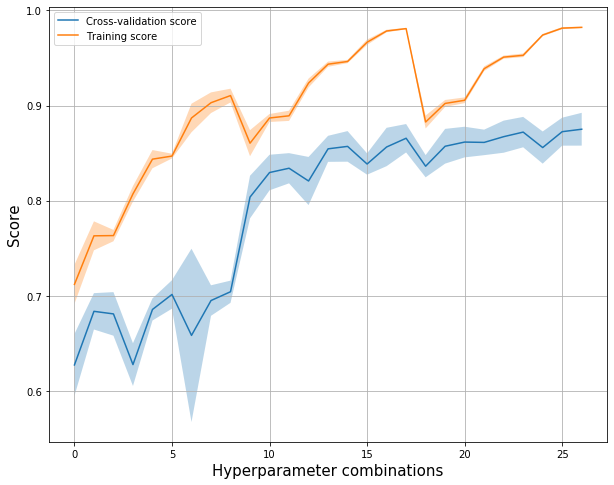

In [110]:
plot_train_cv_scores(model_grid_search_bagging)

In [113]:
#plot_train_cv_scores(model_grid_search_bagging, title='', save=True, filename='bagging_kc_gridsearch.png')
bagging_star=RandomForestRegressor(n_estimators=150)
get_score(bagging_star)

('train', 0.9823325761266982, 'test', 0.8815423849894357)

# features extraction


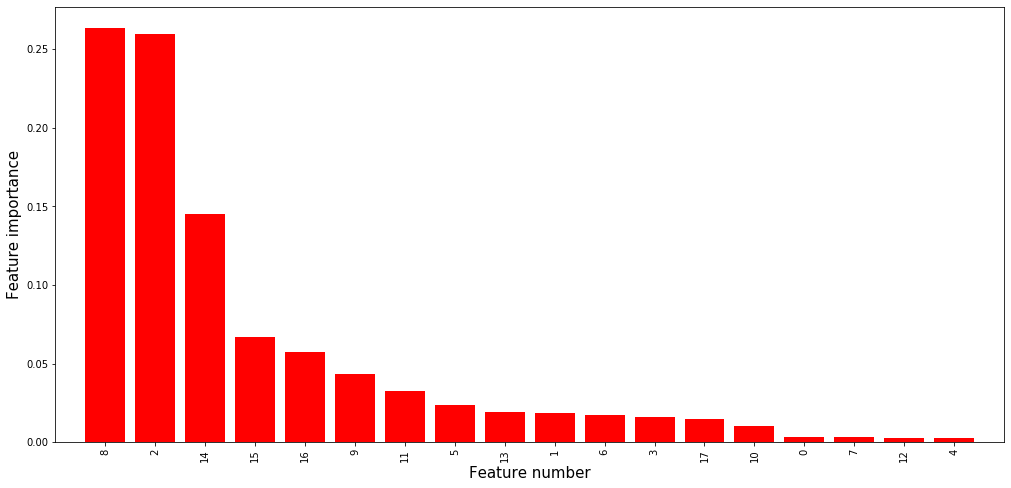

In [114]:

importances = model_grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
most_important_features = features.columns.values[indices]

std = np.std([tree.feature_importances_ for tree in model_grid_search.best_estimator_.estimators_], axis=0)

# Plot the feature importances of the forest
plt.figure(figsize=(17,8), facecolor='white')
#plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center") # to add std error bars :  yerr=std[indices]
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature number', fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
#plt.grid()

plt.savefig('RF_feature_importance_kc.png', dpi=300)
plt.show()

In [115]:
most_important_features

array(['grade', 'sqft_living', 'lat', 'long', 'sqft_living15',
       'sqft_above', 'yr_built', 'waterfront', 'zipcode', 'bathrooms',
       'view', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'bedrooms',
       'condition', 'yr_renovated', 'floors'], dtype=object)